In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-07-31 14:24:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-31 14:24:58 (113 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train'.
There are 0 directories and 702 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Normal'.
There are 0 directories and 418 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Malignant'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Benign'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Test'.
There are 0 directories and 100 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Test/Normal'.
There are 0 directories and 52 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Test/Malignant'.
There are 0 directories and 50 images in '/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Tes

In [4]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Test"

In [5]:

import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 1370 files belonging to 3 classes.
Found 202 files belonging to 3 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [7]:
image_width = 224
image_height = 224
classes = ['Benign', 'Malignant', 'Normal']
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 3000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break

Found 1370 images belonging to 3 classes.
Found 250 images belonging to 1 classes.
Found 418 images belonging to 1 classes.
Found 702 images belonging to 1 classes.


In [8]:
augmented_images3 = os.listdir("/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Benign")

# Count the number of augmented images
num_benign_images = len(augmented_images3)

# Print the number of malignant images
print("Number of benign images:", num_benign_images)

Number of benign images: 3250


In [9]:
augmented_images2 = os.listdir("/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Normal")

# Count the number of augmented images
num_normal_images = len(augmented_images2)

# Print the number of malignant images
print("Number of normal images:", num_normal_images)

Number of normal images: 3702


In [10]:

# Load the augmented images for the malignant class
augmented_images = os.listdir("/content/drive/MyDrive/Tez Dosyaları/recombined 3 classlı/Train/Malignant")

# Count the number of augmented images
num_malignant_images = len(augmented_images)

# Print the number of malignant images
print("Number of malignant images:", num_malignant_images)

Number of malignant images: 3418


In [31]:

import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.VGG19(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])


80134624/80134624 [==============================] - 4s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 512)
Shape after GlobalAveragePooling2D: (None, 512)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240731-151927
Epoch 1/40
43/43 [==============================] - 12s 231ms/step - loss: 1.4419 - accuracy: 0.4876 - val_loss: 1.0918 - val_accuracy: 0.5495
Epoch 2/40
43/43 [==============================] - 11s 230ms/step - loss: 1.0828 - accuracy: 0.5766 - val_loss: 1.0508 - val_accuracy: 0.5495
Epoch 3/40
43/43 [==============================] - 11s 222ms/step - loss: 0.9835 - accuracy: 0.5912 - val_loss: 1.0644 - val_accuracy: 0.5396
Epoch 4/40
43/43 [==============================] - 11s 216ms/step - loss: 0.9516 - accuracy: 0.6139 - val_loss: 1.0658 - val_accuracy: 0.5396
Epoch 5/40
43/43 [==============================] - 10s 210ms/step - loss: 0.8843 - accuracy: 0.6336 - val_loss: 1.0487 - val_accuracy: 0.5297
Epoch 6/40
43

In [32]:
# Evaluate the model on the test data
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

7/7 [==============================] - 2s 149ms/step - loss: 1.1662 - accuracy: 0.5396


[1.1661782264709473, 0.5396039485931396]

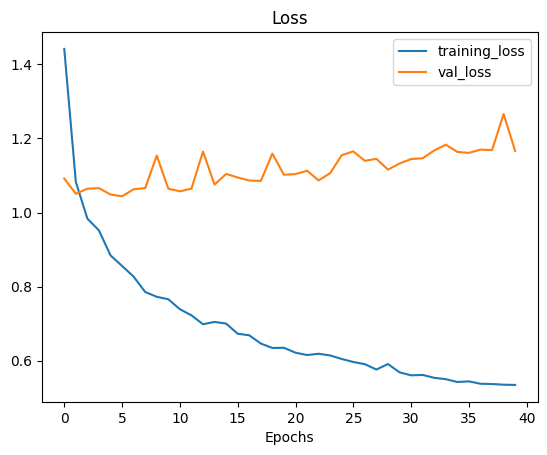

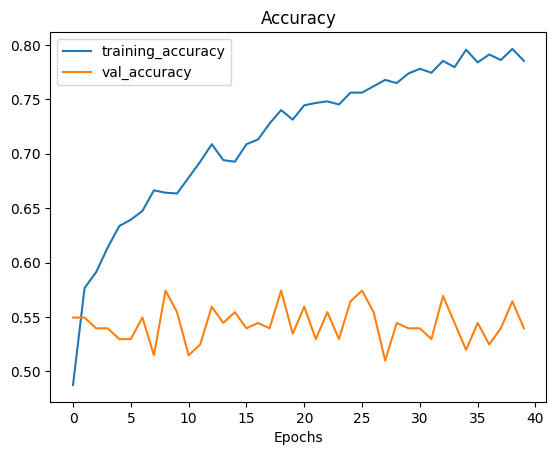

In [33]:

plot_loss_curves(history_0)

In [34]:
from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

7/7 [==============================] - 2s 164ms/step
              precision    recall  f1-score   support

           0       0.26      0.18      0.21        50
           1       0.36      0.31      0.33        52
           2       0.48      0.59      0.53       100

    accuracy                           0.42       202
   macro avg       0.37      0.36      0.36       202
weighted avg       0.39      0.42      0.40       202



In [35]:

# Eğitim doğruluğunu geçmiş verilerinden al
train_accuracy = history_0.history['accuracy']

# Son epoch'un eğitim doğruluğunu yazdır
print("Eğitim doğruluğu:", train_accuracy[-1])


Eğitim doğruluğu: 0.785401463508606
